In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("C:\\Users\\HP\\Desktop\\Dtrees\\credit-approval_csv.csv")

In [3]:
df.tail()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,class
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,260.0,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,200.0,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,200.0,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,280.0,750,-
689,b,35.00,3.375,u,g,c,h,8.29,f,f,0,t,g,0.0,0,-


In [3]:
df = df.dropna(axis=0, how='all')

In [11]:
objList = df.select_dtypes(include = "object").columns
print (objList)

Index(['A1', 'A4', 'A5', 'A6', 'A7', 'A9', 'A10', 'A12', 'A13', 'class'], dtype='object')


In [12]:
#Label Encoding for object to numeric conversion
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for feat in objList:
    df[feat] = le.fit_transform(df[feat].astype(str))

print (df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 653 entries, 0 to 689
Data columns (total 16 columns):
A1       653 non-null int32
A2       653 non-null float64
A3       653 non-null float64
A4       653 non-null int32
A5       653 non-null int32
A6       653 non-null int32
A7       653 non-null int32
A8       653 non-null float64
A9       653 non-null int32
A10      653 non-null int32
A11      653 non-null int64
A12      653 non-null int32
A13      653 non-null int32
A14      653 non-null float64
A15      653 non-null int64
class    653 non-null int32
dtypes: float64(4), int32(10), int64(2)
memory usage: 61.2 KB
None


In [20]:
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,class
0,1,30.83,0.000,2,0,13,8,1.25,1,1,1,0,0,202.0,0,0
1,0,58.67,4.460,2,0,11,3,3.04,1,1,6,0,0,43.0,560,0
2,0,24.50,0.500,2,0,11,3,1.50,1,0,0,0,0,280.0,824,0
3,1,27.83,1.540,2,0,13,8,3.75,1,1,5,1,0,100.0,3,0
4,1,20.17,5.625,2,0,13,8,1.71,1,0,0,0,2,120.0,0,0


In [5]:
df.columns

Index(['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11',
       'A12', 'A13', 'A14', 'A15', 'class'],
      dtype='object')

In [6]:
df.shape

(690, 16)

In [26]:
df.isnull().sum()

A1        0
A2       12
A3        0
A4        0
A5        0
A6        0
A7        0
A8        0
A9        0
A10       0
A11       0
A12       0
A13       0
A14      13
A15       0
class     0
dtype: int64

In [5]:
df = df.dropna(axis=0, how='any') ## As we can see that Money_Value has one null value so I am droping it of this feature.

In [29]:
df.isnull().sum()

A1       0
A2       0
A3       0
A4       0
A5       0
A6       0
A7       0
A8       0
A9       0
A10      0
A11      0
A12      0
A13      0
A14      0
A15      0
class    0
dtype: int64

In [28]:
df.shape

(666, 16)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 690 entries, 0 to 689
Data columns (total 16 columns):
A1       678 non-null object
A2       678 non-null float64
A3       690 non-null float64
A4       684 non-null object
A5       684 non-null object
A6       681 non-null object
A7       681 non-null object
A8       690 non-null float64
A9       690 non-null object
A10      690 non-null object
A11      690 non-null int64
A12      690 non-null object
A13      690 non-null object
A14      677 non-null float64
A15      690 non-null int64
class    690 non-null object
dtypes: float64(4), int64(2), object(10)
memory usage: 91.6+ KB


In [21]:
df.describe()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,class
count,690.000000,678.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.00000,690.000000,690.000000,677.000000,690.000000,690.000000
mean,0.713043,31.568171,4.758725,2.221739,0.728986,6.081159,5.678261,2.223406,0.523188,0.427536,2.40000,0.457971,0.176812,184.014771,1017.385507,0.555072
std,0.489635,11.957862,4.978163,0.455691,1.278561,4.629911,2.966326,3.346513,0.499824,0.495080,4.86294,0.498592,0.557869,173.806768,5210.102598,0.497318
min,0.000000,13.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,22.602500,1.000000,2.000000,0.000000,1.000000,3.000000,0.165000,0.000000,0.000000,0.00000,0.000000,0.000000,75.000000,0.000000,0.000000
50%,1.000000,28.460000,2.750000,2.000000,0.000000,6.000000,8.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,160.000000,5.000000,1.000000
75%,1.000000,38.230000,7.207500,2.000000,0.000000,11.000000,8.000000,2.625000,1.000000,1.000000,3.00000,1.000000,0.000000,276.000000,395.500000,1.000000
max,2.000000,80.250000,28.000000,3.000000,3.000000,14.000000,9.000000,28.500000,1.000000,1.000000,67.00000,1.000000,2.000000,2000.000000,100000.000000,1.000000


In [11]:
df['class'].value_counts()

-    383
+    307
Name: class, dtype: int64

In [12]:
print("percent of +:",(307/690)*100)
print("percent of 0:",(383/690)*100)
# we can observe there is good class balance among two classes

percent of +: 44.492753623188406
percent of 0: 55.507246376811594


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [13]:
y = df[["class"]]
x = df.drop(["class"], axis=1)

In [14]:
## train and test split
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.30, random_state=33333)

In [15]:
# Decision tree on train data 
dtree = DecisionTreeClassifier() ## created decision tree object with default parameters

In [16]:
## train the model 
dtree.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [17]:
## generate predictions on test dataset
pred = dtree.predict(x_test)

In [18]:
confusion_matrix( y_test, pred)

array([[70, 17],
       [26, 83]], dtype=int64)

In [19]:
print(accuracy_score(y_test, pred))

0.7806122448979592


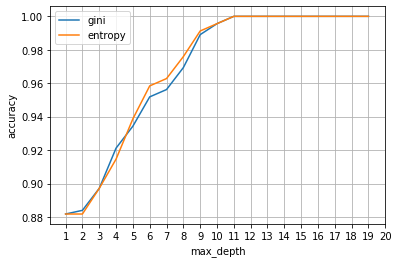

In [21]:
## Train model with different values of max_depth ranging from 1 to 20 and compare the performance of gini and entropy 
import matplotlib.pyplot as plt
max_depth = []
acc_gini = []
acc_entropy = []
for i in range(1,20):
 dtree = DecisionTreeClassifier(criterion='gini', max_depth=i)
 dtree.fit(x_train, y_train)
 pred = dtree.predict(x_train)
 acc_gini.append(accuracy_score(y_train, pred))
 ####
 dtree = DecisionTreeClassifier(criterion='entropy', max_depth=i)
 dtree.fit(x_train, y_train)
 pred = dtree.predict(x_train)
 acc_entropy.append(accuracy_score(y_train, pred))
 ####
 max_depth.append(i)
d = pd.DataFrame({'acc_gini':pd.Series(acc_gini), 
 'acc_entropy':pd.Series(acc_entropy),
 'max_depth':pd.Series(max_depth)})
# visualizing changes in parameters
fig, ax = plt.subplots()
plt.plot('max_depth','acc_gini', data=d, label='gini')
plt.plot('max_depth','acc_entropy', data=d, label='entropy')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.xticks(np.arange(1,21))
plt.grid()
plt.legend()

In [ ]:
# from this plot we can infor entropy gives high accuracy than gini becz entropy curve lies on top of gini curve

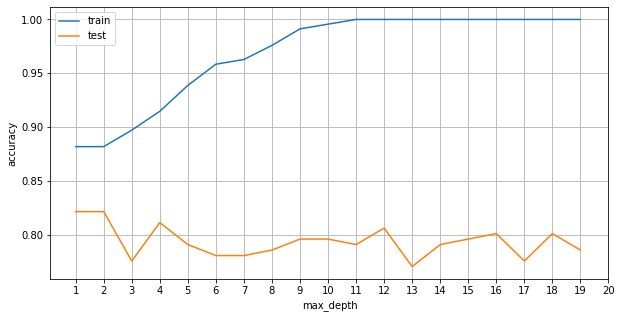

In [48]:
max_depth = []
acc_train = []
acc_test = []
for i in range(1,20):
 dtree = DecisionTreeClassifier(criterion='entropy', max_depth=i)
 dtree.fit(x_train, y_train)
 pred = dtree.predict(x_train)
 pred2 = dtree.predict(x_test)
 acc_train.append(accuracy_score(y_train, pred))
 ####
 acc_test.append(accuracy_score(y_test, pred2))
 ####
 max_depth.append(i)
d = pd.DataFrame({'acc_train':pd.Series(acc_train), 
 'acc_test':pd.Series(acc_test),
 'max_depth':pd.Series(max_depth)})
# visualizing changes in parameters
fig, ax = plt.subplots(figsize = [10,5])
plt.plot('max_depth','acc_train', data=d, label='train')
plt.plot('max_depth','acc_test', data=d, label='test')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.xticks(np.arange(1,21))
plt.grid()
plt.legend()

In [ ]:
# from these plot we can infor on 3rd level split onwards there exist a lot differnce bw training accuracy(75) and
# test accuracy(90) ie on 3rd split onwards model is overfitted


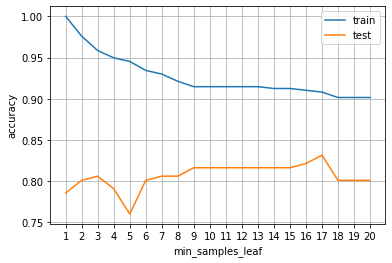

In [87]:
min_samples_leaf = []
acc_train = []
acc_test = []
for i in range(1,21):
 dtree = DecisionTreeClassifier(criterion='entropy', min_samples_leaf=i)
 dtree.fit(x_train, y_train)
 pred = dtree.predict(x_train)
 pred2 = dtree.predict(x_test)
 acc_train.append(accuracy_score(y_train, pred))
 ####
 acc_test.append(accuracy_score(y_test, pred2))
 ####
 min_samples_leaf.append(i)
d = pd.DataFrame({'acc_train':pd.Series(acc_train), 
 'acc_test':pd.Series(acc_test),
 'min_samples_leaf':pd.Series(min_samples_leaf)})
# visualizing changes in parameters
fig, ax = plt.subplots()
plt.plot('min_samples_leaf','acc_train', data=d, label='train')
plt.plot('min_samples_leaf','acc_test', data=d, label='test')
plt.xlabel('min_samples_leaf')
plt.ylabel('accuracy')
plt.xticks(np.arange(1,21))
plt.grid()
plt.legend()

In [73]:
# from these plot we can infor "The minimum number of samples required to be at a leaf node" is 17.
# becz out of all 1 to 20 min num of observations in leaf node, 17 has highest test accuracy(~83%) and its near to 
# train accuracy(~91%) also so there is no prblem of overfitting.(actually if we consider dt diff is enough so can say moderate overfitting)

In [86]:
?DecisionTreeClassifier

In [49]:
## created decision tree object with given parameters
dtree1 = DecisionTreeClassifier(max_depth = 3,criterion='entropy', random_state=1234)
## train the model 
dtree1.fit(x_train, y_train)
## generate predictions on test dataset
pred1 = dtree1.predict(x_test)

In [50]:
?DecisionTreeClassifier

In [51]:
confusion_matrix( y_test, pred1)

array([[60, 27],
       [17, 92]], dtype=int64)

In [52]:
# Accuracy on Test dataset
print(accuracy_score(y_test, pred1))

0.7755102040816326


In [53]:
## generate predictions on train dataset
pred2 = dtree1.predict(x_train)

In [54]:
confusion_matrix( y_train, pred2)

array([[176,  33],
       [ 14, 234]], dtype=int64)

In [55]:
# Accuracy on Test dataset
print(accuracy_score(y_train, pred2))

0.8971553610503282


In [ ]:
#Conclusion: There exists high difference bw Accuracy on traing data and Accuracy on test data...It resembles that model is
# overfitted at 3rd level split onwards
# so we can use splits=2

In [57]:
## created decision tree object with given parameters
dtree2 = DecisionTreeClassifier(max_depth = 2,criterion='entropy', random_state=1234)
## train the model 
dtree2.fit(x_train, y_train)
## generate predictions on test dataset
pred3 = dtree2.predict(x_test)
## confusion Matrix
confusion_matrix( y_test, pred3)

array([[80,  7],
       [28, 81]], dtype=int64)

In [59]:
# Accuracy on Test dataset
print(accuracy_score(y_test, pred3))

0.8214285714285714


In [67]:
print("percent of +:",(307/690)*100)
print("percent of 0:",(383/690)*100)
# we can observe there is good class balance among two classes

percent of +: 44.492753623188406
percent of 0: 55.507246376811594


In [ ]:
## its good balanced data set..so, decision tree with max_depth is good to go with and observed at max_depth=2 model is
## unbiased....
## but the problem is max_depth = 2 means there model used only 3 variables(or less than 3 becz variable can reused)
## out of 15 variables....becz of this we lost explainability about target variable. 
## to resolve this problem we can use ensemble models

-------------------------------------

## Random Forest

In [60]:
import sklearn
from sklearn.ensemble import RandomForestClassifier

In [61]:
?RandomForestClassifier

In [62]:
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,class
0,1,30.83,0.000,1,0,12,7,1.25,1,1,1,0,0,202.0,0,0
1,0,58.67,4.460,1,0,10,3,3.04,1,1,6,0,0,43.0,560,0
2,0,24.50,0.500,1,0,10,3,1.50,1,0,0,0,0,280.0,824,0
3,1,27.83,1.540,1,0,12,7,3.75,1,1,5,1,0,100.0,3,0
4,1,20.17,5.625,1,0,12,7,1.71,1,0,0,0,2,120.0,0,0


In [63]:
## random Forest model 
rf = RandomForestClassifier()

In [71]:
?RandomForestClassifier

In [64]:
# traing the model on traing data set
rf.fit( x_train, y_train )

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [65]:
## predicting on test data
y_pred = rf.predict( x_test)

In [66]:
confusion_matrix( y_test, y_pred)

array([[72, 15],
       [18, 91]], dtype=int64)

In [68]:
print(accuracy_score(y_test, y_pred))

0.8316326530612245


In [70]:
x.shape

(653, 15)

In [ ]:
## Random Forest model with Default parameters taken n_estimators=100(The number of trees(bags) in the forest) means 
## 653/100 approx 65 observation in each tree or bag...building model for 65 observation is waste of time and meaning less
## we can flip coin atlest we get 50% accuracy...increase of 33%(accuracy on test data) accuracy 
## we are build random forest is meanin less 
## to resolve these problem we are going to finetune parameters.

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConvers

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  del sys.path[0]


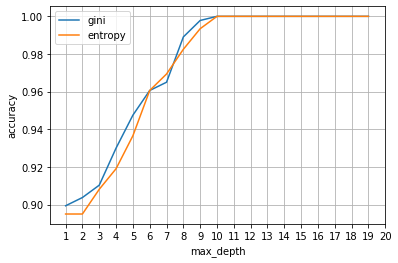

In [95]:
## Train model with different values of max_depth ranging from 1 to 20 and compare the performance of gini and entropy 
import matplotlib.pyplot as plt
max_depth = []
acc_gini = []
acc_entropy = []
for i in range(1,20):
 rf = RandomForestClassifier(criterion='gini', max_depth=i)
 rf.fit(x_train, y_train)
 pred = rf.predict(x_train)
 acc_gini.append(accuracy_score(y_train, pred))
 ####
 rf = RandomForestClassifier(criterion='entropy', max_depth=i)
 rf.fit(x_train, y_train)
 pred = rf.predict(x_train)
 acc_entropy.append(accuracy_score(y_train, pred))
 ####
 max_depth.append(i)
d = pd.DataFrame({'acc_gini':pd.Series(acc_gini), 
 'acc_entropy':pd.Series(acc_entropy),
 'max_depth':pd.Series(max_depth)})
# visualizing changes in parameters
fig, ax = plt.subplots()
plt.plot('max_depth','acc_gini', data=d, label='gini')
plt.plot('max_depth','acc_entropy', data=d, label='entropy')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.xticks(np.arange(1,21))
plt.grid()
plt.legend()

In [ ]:
## from this graph gini is selected

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y wa

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y wa

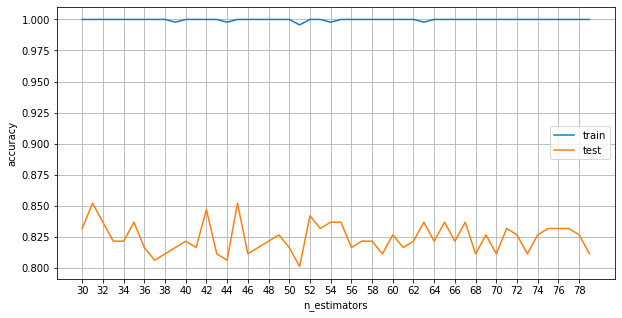

In [90]:
n_estimators = []
acc_train = []
acc_test = []
for i in range(30,80):
 rf = RandomForestClassifier(criterion='gini', n_estimators=i)
 rf.fit(x_train, y_train)
 pred = rf.predict(x_train)
 pred2 = rf.predict(x_test)
 acc_train.append(accuracy_score(y_train, pred))
 ####
 acc_test.append(accuracy_score(y_test, pred2))
 ####
 n_estimators.append(i)
d = pd.DataFrame({'acc_train':pd.Series(acc_train), 
 'acc_test':pd.Series(acc_test),
 'n_estimators':pd.Series(n_estimators)})
# visualizing changes in parameters
fig, ax = plt.subplots(figsize = [10,5])
plt.plot('n_estimators','acc_train', data=d, label='train')
plt.plot('n_estimators','acc_test', data=d, label='test')
plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.xticks(np.arange(30,80,2))
plt.grid()
plt.legend()

In [ ]:
# from this graph we can infor at n_estimators = 45 we are getting high accuracy

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: A column-vector y wa

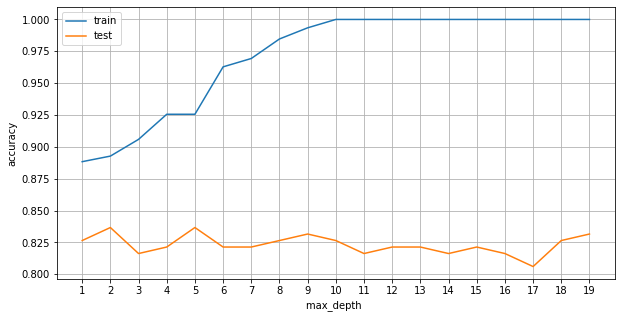

In [93]:
max_depth  = []
acc_train = []
acc_test = []
for i in range(1,20):
 rf = RandomForestClassifier(criterion='gini', max_depth =i)
 rf.fit(x_train, y_train)
 pred = rf.predict(x_train)
 pred2 = rf.predict(x_test)
 acc_train.append(accuracy_score(y_train, pred))
 ####
 acc_test.append(accuracy_score(y_test, pred2))
 ####
 max_depth .append(i)
d = pd.DataFrame({'acc_train':pd.Series(acc_train), 
 'acc_test':pd.Series(acc_test),
 'max_depth ':pd.Series(max_depth )})
# visualizing changes in parameters
fig, ax = plt.subplots(figsize = [10,5])
plt.plot('max_depth ','acc_train', data=d, label='train')
plt.plot('max_depth ','acc_test', data=d, label='test')
plt.xlabel('max_depth ')
plt.ylabel('accuracy')
plt.xticks(np.arange(1,20))
plt.grid()
plt.legend()

In [ ]:
## from this graph max_depth = 2

In [91]:
?RandomForestClassifier

In [96]:
## Random Forest with Tuned Parameter
## random Forest model 
rf = RandomForestClassifier(n_estimators=45, max_features= 5, class_weight='balanced',  max_depth=2,random_state = 123 )
## for classification max_features = 15/3=5=((no.of i/p)/3)

In [97]:
rf.fit(x_train,y_train)

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=2, max_features=5,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=45,
                       n_jobs=None, oob_score=False, random_state=123,
                       verbose=0, warm_start=False)

In [98]:
y_pred1 = rf.predict(x_test)

In [99]:
confusion_matrix(y_test,y_pred1)

array([[77, 10],
       [21, 88]], dtype=int64)

In [100]:
accuracy_score(y_test,y_pred1) 

0.8418367346938775

In [101]:
## Conclusion:rf with tunned parameter is better than rf with default parameter

In [102]:
## variable importance of Randomforest model 
rf.feature_importances_

array([0.00000000e+00, 4.15486090e-03, 9.10030915e-03, 1.17929600e-03,
       0.00000000e+00, 1.10217804e-02, 1.24134883e-03, 9.62761215e-02,
       4.69342560e-01, 1.13398685e-01, 2.09407258e-01, 2.14876901e-04,
       4.30225072e-04, 1.91382708e-02, 6.50944081e-02])

In [103]:
## Sorting variables on the importance 
import pandas as pd
feature_importances = pd.DataFrame(rf.feature_importances_, index = x_train.columns,columns=['importance']).sort_values('importance',  ascending=False)                                                          

In [104]:
feature_importances

,importance
A9,0.469343
A11,0.209407
A10,0.113399
A8,0.096276
A15,0.065094
A14,0.019138
A6,0.011022
A3,0.009100
A2,0.004155
A7,0.001241


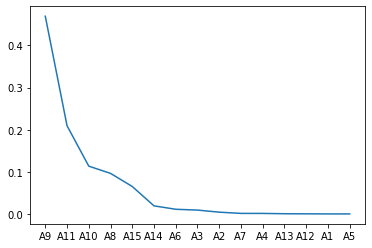

In [111]:
import matplotlib.pyplot as plt
plt.plot(feature_importances)
plt.show()

In [ ]:
## till we did Parameter tunning manually...It will consider lot of time and need to analyse teh data means our affort is
## more, insted of this we can use defalut module like GridSearchCV

In [110]:
from sklearn.model_selection import GridSearchCV

In [112]:
## grid parameters for grid search
param_grid = {
    'max_depth': [3,4,5,6,7,8],
    'n_estimators': [10, 20, 30,40,50,60],
    'max_features' : [2,3,4,5,6,7]
}

In [113]:
x.shape

(653, 15)

In [114]:
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 4, n_jobs = -1, verbose = 2)

In [115]:
grid_search.fit(x_train, y_train)

Fitting 4 folds for each of 216 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   48.3s
[Parallel(n_jobs=-1)]: Done 221 tasks      | elapsed:   54.5s
[Parallel(n_jobs=-1)]: Done 627 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 857 out of 864 | elapsed:  1.3min remaining:    0.5s
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed:  1.3min finished
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


GridSearchCV(cv=4, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [116]:
grid_search.best_params_

{'max_depth': 4, 'max_features': 5, 'n_estimators': 60}

In [117]:
grid_search.cv_results_

{'mean_fit_time': array([0.1848104 , 0.05859119, 0.07812297, 0.10155845, 0.12108904,
        0.13671452, 0.03906298, 0.05859053, 0.0781213 , 0.09584343,
        0.13729733, 0.1655497 , 0.03124887, 0.06249762, 0.08202857,
        0.09765303, 0.12499654, 0.15233779, 0.04687321, 0.06640506,
        0.08573812, 0.11368221, 0.12591982, 0.14965498, 0.08744586,
        0.09768152, 0.12892061, 0.15989876, 0.19088435, 0.19712692,
        0.03722274, 0.06795704, 0.08819616, 0.11167979, 0.13616425,
        0.17564029, 0.04022479, 0.06195617, 0.0814501 , 0.10917014,
        0.13141811, 0.15839761, 0.04222125, 0.06770837, 0.08844292,
        0.11392838, 0.12941658, 0.16464156, 0.03772181, 0.06420815,
        0.0876956 , 0.11692625, 0.13391572, 0.16639596, 0.0402205 ,
        0.06796354, 0.08968711, 0.1194278 , 0.14315909, 0.16939449,
        0.04172444, 0.06571496, 0.08943504, 0.11967552, 0.13790935,
        0.1731391 , 0.03997386, 0.07045329, 0.0921917 , 0.13566458,
        0.20661646, 0.23584968,

In [120]:
## Traing the RF with best parameters given by GridSearchCV
rf = RandomForestClassifier(n_estimators=60, max_features= 5, class_weight='balanced',  max_depth=4,random_state = 222 )

In [122]:
rf.fit( x_train, y_train )

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=4, max_features=5,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=60,
                       n_jobs=None, oob_score=False, random_state=222,
                       verbose=0, warm_start=False)

In [123]:
y_pred2 = rf.predict( x_test)

In [124]:
confusion_matrix( y_test, y_pred)

array([[72, 15],
       [18, 91]], dtype=int64)

In [125]:
accuracy_score(y_test, y_pred)

0.8316326530612245